<a href="https://colab.research.google.com/github/airbytehq/quickstarts/blob/aj%2Fairbyte-lib-quickstart/airbyte_lib_notebooks/AirbyteLib_Basic_Features_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AirbyteLib Demo

Below is a pre-release demo of AirbyteLib.


## Install AirbyteLib


In [1]:
# Add virtual environment support for running in Google Colab ()
!apt-get install -qq python3.10-venv

# Install airbyte-lib
%pip install --quiet 'git+https://github.com/airbytehq/airbyte.git@master#egg=airbyte-lib&subdirectory=airbyte-lib'

Selecting previously unselected package python3-pip-whl.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../python3-pip-whl_22.0.2+dfsg-1ubuntu0.4_all.deb ...
Unpacking python3-pip-whl (22.0.2+dfsg-1ubuntu0.4) ...
Selecting previously unselected package python3-setuptools-whl.
Preparing to unpack .../python3-setuptools-whl_59.6.0-1.2ubuntu0.22.04.1_all.deb ...
Unpacking python3-setuptools-whl (59.6.0-1.2ubuntu0.22.04.1) ...
Selecting previously unselected package python3.10-venv.
Preparing to unpack .../python3.10-venv_3.10.12-1~22.04.3_amd64.deb ...
Unpacking python3.10-venv (3.10.12-1~22.04.3) ...
Setting up python3-setuptools-whl (59.6.0-1.2ubuntu0.22.04.1) ...
Setting up python3-pip-whl (22.0.2+dfsg-1ubuntu0.4) ...
Setting up python3.10-venv (3.10.12-1~22.04.3) ...
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Test that the install was successful
import airbyte_lib as ab

## Locating your Data Source

To see what data sources are available, you can check [our docs](https://docs.airbyte.com/using-airbyte/airbyte-lib/getting-started) or run the following:


In [ ]:
ab.

## Load the Source Data using AirbyteLib


Create and install a source connector:


In [3]:
import airbyte_lib as ab

# Create and install the source:
source: ab.Source = ab.get_source("source-faker")

In [4]:
# Configure the source
source.set_config(
    config={
        "count": 50_000, # Adjust this to get a larger or smaller dataset
        "seed": 123,
    },
)
# Verify the config and creds by running `check`:
source.check()

## Read Data from the AirbyteLib Cache

Once data is read, we can do anything we want to with the resulting streams. This includes `to_pandas()` which registers a Pandas dataframe and `to_sql_table()` which gives us a SQLAlchemy `Table` boject, which we can use to run SQL queries.


In [5]:
# Select all of the source's streams and read data into the internal cache:
source.select_all_streams()
read_result: ab.ReadResult = source.read()

## Read Progress

Started reading at 01:50:52.

Read **100,135** records over **1min 9s** (1,451.2 records / second).

Wrote **100,100** records over 11 batches.

Finished reading at 01:52:02.

Started finalizing streams at 01:52:02.

Finalized **11** batches over 1 seconds.

Completed 3 streams:

  - purchases
  - users
  - products



------------------------------------------------


In [6]:
# Display or transform the loaded data
products_df = read_result["products"].to_pandas()
display(products_df)

,id,make,model,year,price,created_at,updated_at
0,1,Mazda,MX-5,2008,2869.0,2022-02-01 17:02:19,2024-02-03 01:50:54
1,2,Mercedes-Benz,C-Class,2009,42397.0,2021-01-25 14:31:33,2024-02-03 01:50:54
2,3,Honda,Accord Crosstour,2011,63293.0,2021-02-11 05:36:03,2024-02-03 01:50:54
3,4,GMC,Jimmy,1998,34079.0,2022-01-24 03:00:03,2024-02-03 01:50:54
4,5,Infiniti,FX,2004,17036.0,2021-10-02 03:55:44,2024-02-03 01:50:54
...,...,...,...,...,...,...,...
95,96,BMW,330,2006,14494.0,2021-09-17 20:52:48,2024-02-03 01:50:54
96,97,Audi,R8,2008,17642.0,2021-09-21 11:56:24,2024-02-03 01:50:54
97,98,Cadillac,CTS-V,2007,19914.0,2021-09-02 15:38:46,2024-02-03 01:50:54
98,99,GMC,1500 Club Coupe,1997,82288.0,2021-04-20 18:58:15,2024-02-03 01:50:54


## Creating graphs

AirbyteLib integrates with Pandas, which integrates with `matplotlib` as well as many other popular libraries. We can use this as a means of quickly creating graphs.


/usr/local/lib/python3.10/dist-packages/duckdb_engine/__init__.py:178: DuckDBEngineWarning: duckdb-engine doesn't yet support reflection on indices
  warnings.warn(


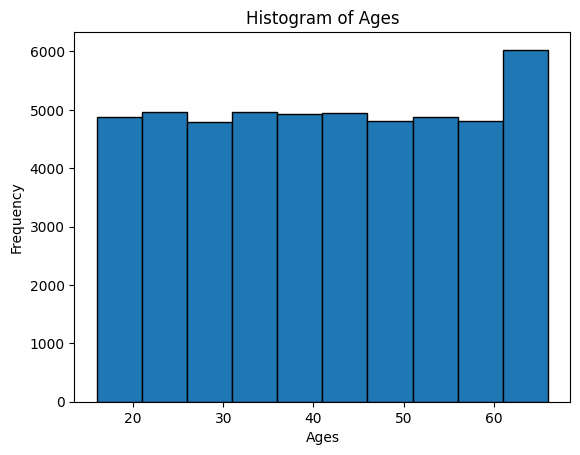

In [7]:
%pip install matplotlib

import matplotlib.pyplot as plt

users_df = read_result["users"].to_pandas()

plt.hist(users_df['age'], bins=10, edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

## Working in SQL

Since data is cached in a local DuckDB database, we can query the data with SQL.

We can do this in multiple ways. One way is to use the [JupySQL Extension](https://jupysql.ploomber.io/en/latest/user-guide/template.html), which we'll use below.


In [8]:
# Install JupySQL to enable SQL cell magics
%pip install --quiet jupysql
# Load JupySQL extension
%load_ext sql
# Configure max row limit (optional)
%config SqlMagic.displaylimit = 200

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.2/414.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
Deploy FastAPI apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [9]:
# Get the SQLAlchemy 'engine' object for the cache
engine = read_result.cache.get_sql_engine()
# Pass the engine to JupySQL
%sql engine

In [10]:
# Get the table for the 'users' stream
users_table = read_result.cache.get_sql_table("users")
display(users_table.fullname)

/usr/local/lib/python3.10/dist-packages/duckdb_engine/__init__.py:178: DuckDBEngineWarning: duckdb-engine doesn't yet support reflection on indices
  warnings.warn(


'main.users'

In [11]:
%%sql
# We can now dynamically pass the table reference into a SQL query

SELECT name, occupation, age, nationality
FROM {{ users_table.fullname }}
LIMIT 20

Running query in 'duckdb:///.cache/default_cache_db.duckdb'

name,occupation,age,nationality
Murray,Reporter,36,Uruguayan
Danyell,Brewery Manager,63,Latvian
Shirleen,Recovery Vehicle Coordinator,46,Ecuadorian
Carroll,Tug Skipper,63,Bolivian
Osvaldo,Genealogist,63,Japanese
Cicely,Tattooist,59,Portuguese
Kyle,Park Attendant,65,Mexican
Leland,Turkey Farmer,20,Russian
Christia,Tour Guide,18,Spanish
Bennie,Cafe Worker,45,Costa Rican


In [12]:
# Show tables for the other streams
%sqlcmd tables

Name
products
purchases
users
_airbytelib_streams
